In [1]:
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt
plt.style.use('dark_background')

PageRank определяется по связности матрице взешенного графа как решение следующего уравнения:  
$v^T ((1-d) P + dE) = v^T$  
$v^T ((1-d) P + dE) - v^T I = 0$  
$v^T ((1-d) P + dE - I) = 0$ - решение задачи поиска собственных векторов

In [2]:
def load_matrix(name, eps=0.1):
    mat = np.load(name)
    return (mat.T / np.maximum(mat.sum(axis=1), 0.1)).T

In [3]:
def pagerank(mat):
    P = 0.9*mat + 0.1/mat.shape[0]
    eigenvalues, eigenvectors = np.linalg.eig(P.T)
    eigenvectors = eigenvectors.T
    ind = np.argmax(eigenvalues)
    pagerank_eig = eigenvectors[ind]/eigenvectors[ind].sum()
    assert not np.iscomplex(pagerank_eig).any()
    pagerank_eig = np.real(pagerank_eig)

    return pagerank_eig

In [13]:
def draw_graph(mat):
    G = nx.from_numpy_matrix(mat)
    nx.draw_networkx(G, edge_color='white', arrows=True)

In [5]:
# mat = nx.adjacency_matrix(G)
mat = load_matrix('./graph_samples/adg_3.npy')
pagerank_mcmc = np.load('graph_samples/pagerank_3.npy')

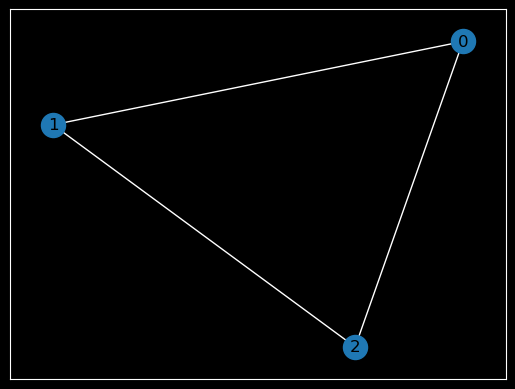

In [6]:
draw_graph(mat)

In [12]:
pagerank_eig = pagerank(mat)
pagerank_eig

array([0.33333333, 0.33333333, 0.33333333])

In [13]:
pagerank_eig - pagerank_mcmc

array([-0.00023667,  0.00078333, -0.00054667])

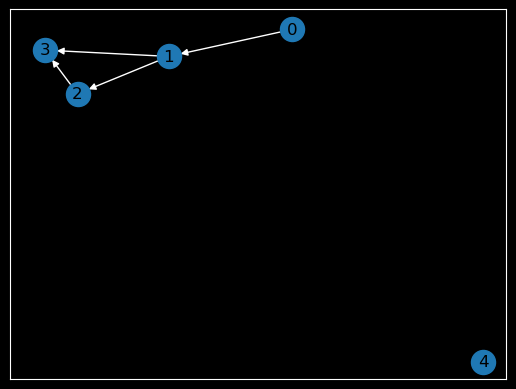

In [15]:
# mat = nx.adjacency_matrix(G)
mat5 = load_matrix('./graph_samples/adg_4_empty.npy')
pagerank_mcmc5 = np.load('graph_samples/pagerank_4_empty.npy')
draw_graph(mat5.T)

In [27]:
pagerank_eig = pagerank(mat5)
print("Analytics:", pagerank_eig)
print("MCMC:     ", pagerank_mcmc5)

Analytics: [0.02037357 0.32633725 0.31956311 0.31335249 0.02037357]
MCMC:      [0.02426 0.32465 0.31686 0.30893 0.0253 ]


In [23]:
pagerank_eig - pagerank_mcmc5

array([-0.00388643,  0.00168725,  0.00270311,  0.00442249, -0.00492643])

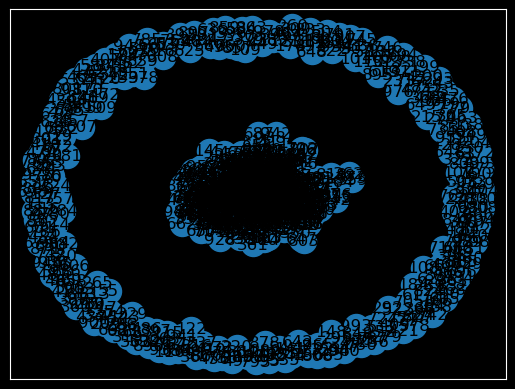

In [16]:
# mat = nx.adjacency_matrix(G)
mat5 = load_matrix('./graph_samples/adg_barabsi.npy')
pagerank_mcmc5 = np.load('graph_samples/pagerank_barabsi.npy')


In [ ]:
# draw_graph(mat5)

In [10]:
pagerank_eig = pagerank(mat5)
# print("Analytics:", pagerank_eig)
# print("MCMC:     ", pagerank_mcmc5)

In [11]:
np.abs(pagerank_eig - pagerank_mcmc5).mean()

0.0004952343966960492

In [12]:
np.abs(pagerank_mcmc5).mean()

0.001

In [21]:
pagerank_nx = np.array(list(nx.pagerank(nx.from_numpy_matrix(mat5)).values()))

In [26]:
np.abs(pagerank_eig - pagerank_nx).mean()

0.0007435015325398906

In [27]:
np.abs(pagerank_mcmc5 - pagerank_nx).mean()

0.0004962817408555851